# Ex 1.- Guassian-distributed random value

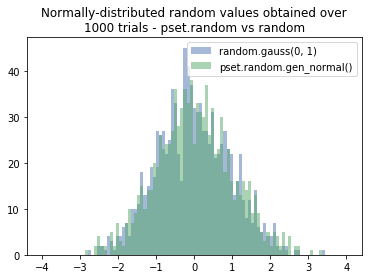

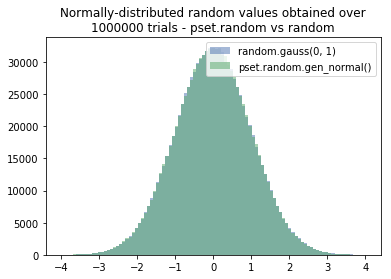

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

from textwrap import wrap
import numpy as np
import random

from pset.random import gen_normal


# Plot results over a set of trials
def test_normal(trials, filename):
    P = [gen_normal() for _ in range(trials)]
    Q = [random.gauss(0, 1) for _ in range(trials)]
    bins = np.linspace(-4, 4, 100)
    plt.figure('Test normal')
    title = '\n'.join(wrap(
        'Normally-distributed random values obtained over {} trials - pset.random vs random'.format(trials),
        50
    ))
    plt.title(title)
    plt.hist(P, bins, alpha=0.5, label='random.gauss(0, 1)')
    plt.hist(Q, bins, alpha=0.5, label='pset.random.gen_normal()')
    plt.legend(loc='upper right')
    plt.savefig('./assets/{}'.format(filename), dpi=400)
    plt.show()

test_normal(10 ** 3, 'ex1-results1.png')
test_normal(10 ** 6, 'ex1-results2.png')

# Ex 2.- (1+1)-ES

In [1]:
import numpy as np

from pset.algorithms import ES1P1
from pset.individuals import Sphere


def run_es1p1_sphere(d, max_trials, precision, fifth_rule_enabled=False):
    parent = Sphere([-99 for _ in range(d)])
    sim = ES1P1(
        max_trials=max_trials,
        precision=precision,
        parent=parent,
        fifth_rule_enabled=fifth_rule_enabled
    )
    print("Starting simulation with d={} (fifth rule {})".format(
        d,
        'enabled' if fifth_rule_enabled else 'disabled')
    ) 
    sim.run()
    
    print("Objective reached")
    print("\tGenerations:", sim.generations)
    print("\tSuccessful mutations:", sum(sim.successful_mutations))
    print("\tChromosome mean:", np.mean(sim.parent.chromosome))
    print("\tFitness:", sim.parent.fitness)


precision = 0.001
max_trials = 10**6
run_es1p1_sphere(10, max_trials=max_trials, precision=precision)
run_es1p1_sphere(100, max_trials=max_trials, precision=precision)

run_es1p1_sphere(10, max_trials=max_trials, precision=precision, fifth_rule_enabled=True)
run_es1p1_sphere(100, max_trials=max_trials, precision=precision, fifth_rule_enabled=True)

Starting simulation with d=10 (fifth rule disabled)
Objective reached
	Generations: 1000000
	Successful mutations: 418
	Chromosome mean: 0.08886817205003997
	Fitness: 0.35752498397635424
Starting simulation with d=100 (fifth rule disabled)
Objective reached
	Generations: 1000000
	Successful mutations: 1372
	Chromosome mean: -0.2104005636543952
	Fitness: 127.60475608056896
Starting simulation with d=10 (fifth rule enabled)
Objective reached
	Generations: 737
	Successful mutations: 170
	Chromosome mean: -0.0024483129036629355
	Fitness: 0.0009251019646330118
Starting simulation with d=100 (fifth rule enabled)
Objective reached
	Generations: 26757
	Successful mutations: 5422
	Chromosome mean: -4.5692295000328875e-05
	Fitness: 0.0009974809586767927


# Ex 3.- ($\mu$+$\lambda$)-ES

In [16]:
from pset.algorithms import ESMuPLambda
from pset.individuals import Sphere

def run_es_mu_lambda(max_trials, precision, problem, dimensions, mu, lam, search_space):
    sim = ESMuPLambda(
        max_trials=max_trials,
        precision=precision,
        problem_class=problem,
        dimensions=dimensions,
        mu=mu,
        lam=lam,
        search_space=search_space
    )
    print('*' * 100)
    print("Starting (mu+lambda) simulation to solve {} with {} dimensions".format(
        problem.__name__,
        dimensions
    ))
    print('\tMu={}\tLambda={}\tPrecision={}\tMax trials={}\tSearch space={}'.format(mu, lam, precision, max_trials, search_space))
    sim.run()
    print('Simulation finished!')
    print('\tGenerations:', sim.generations)
    best = sorted(sim.population, key=lambda x: x.fitness)[0]
    print('\tBest:')
    print('\tFitness:', best.fitness)
    print('\tChromosome:', ['{:.3f}'.format(g) for g in best.chromosome])
    

max_trials = 10**3
precision = 0.001

run_es_mu_lambda(max_trials, precision, Sphere, 2, 10, 10, [-30, 30])

****************************************************************************************************
Starting (mu+lambda) simulation to solve Sphere with 2 dimensions
	Mu=10	Lambda=10	Precision=0.001	Max trials=1000	Search space=[-30, 30]
Simulation finished!
	Generations: 34
	Best:
	Fitness: 0.00018431470418046991
	Chromosome: ['0.014', '0.001']
